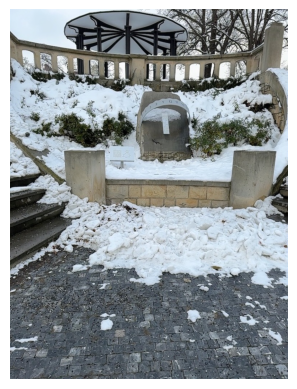

In [13]:
import matplotlib.pyplot as plt
import cv2

# Load the image
image = cv2.imread('./data/train/lizard/images/00047.png')

# Convert BGR to RGB (Matplotlib expects RGB)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot the image
plt.imshow(image_rgb)
plt.axis('off')  # Hide axis
plt.show()

In [33]:
sample_image  = plt.imread('./data/train/lizard/images/00047.png')

In [27]:
import torch
import numpy as np
import plotly.graph_objs as go
from plotly.offline import plot


# Assuming you have an image tensor already
image_tensor = torch.rand(3, 224, 224)  # Example random tensor, replace it with your image tensor

# Get dimensions of the image tensor
num_channels, height, width = image_tensor.shape

# Create meshgrid for X, Y coordinates
X, Y = torch.meshgrid(torch.arange(width), torch.arange(height))

# Create Z coordinates (all zeros or a constant value)
Z = torch.zeros_like(X)  # Z will be constant (0 in this case)

# Flatten X, Y, and Z arrays
X_flat = X.flatten()
Y_flat = Y.flatten()
Z_flat = Z.flatten()

# Print shapes of X, Y, Z arrays
print("Shape of X:", X_flat.shape, X.shape)
print("Shape of Y:", Y_flat.shape)
print("Shape of Z:", Z_flat.shape)

Shape of X: torch.Size([50176]) torch.Size([224, 224])
Shape of Y: torch.Size([50176])
Shape of Z: torch.Size([50176])


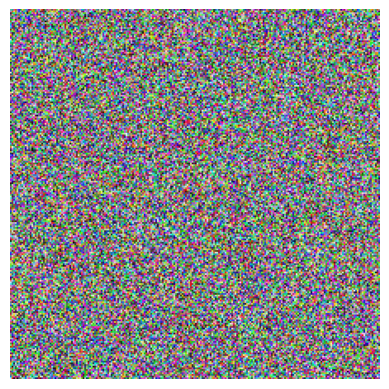

array([[[0.35384983, 0.76687986, 0.6201028 ],
        [0.06195563, 0.77469826, 0.6454579 ],
        [0.92949075, 0.21081084, 0.6552914 ],
        ...,
        [0.3519479 , 0.5536123 , 0.51718533],
        [0.865611  , 0.35001093, 0.09676433],
        [0.65474886, 0.6434392 , 0.6065684 ]],

       [[0.68569154, 0.5267892 , 0.8566792 ],
        [0.7845375 , 0.5054163 , 0.03608924],
        [0.98718417, 0.7612858 , 0.5364265 ],
        ...,
        [0.05905491, 0.7251234 , 0.19593316],
        [0.6974134 , 0.32581776, 0.9381961 ],
        [0.24307394, 0.04014957, 0.34632087]],

       [[0.4581483 , 0.02404577, 0.13251   ],
        [0.11051667, 0.7062643 , 0.37454605],
        [0.02691221, 0.8410445 , 0.9222301 ],
        ...,
        [0.5545878 , 0.92591405, 0.13025367],
        [0.19187677, 0.76455754, 0.42185938],
        [0.20507741, 0.9885009 , 0.08353937]],

       ...,

       [[0.39169693, 0.5046855 , 0.4309219 ],
        [0.75472504, 0.43573117, 0.56048304],
        [0.3028949 , 0

In [26]:
# Convert image tensor to NumPy array
image_array = image_tensor.permute(1, 2, 0).cpu().numpy()  # Convert from (C, H, W) to (H, W, C)

# Plot the image
plt.imshow(image_array)
plt.axis('off')  # Hide axis
plt.show()

In [25]:
# Create a scatter3d trace for plotting
trace = go.Scatter3d(
    x=X_flat,
    y=Y_flat,
    z=Z_flat,
    mode='markers',
    marker=dict(
        size=1,
        # color=colors,
        opacity=1
    ),
    name='Mesh Points'
)

# Create layout
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='X'),
        yaxis=dict(title='Y'),
        zaxis=dict(title='Z')
    ),
    title='Mesh Points Visualization'
)

# Create figure
fig = go.Figure(data=[trace], layout=layout)

# Show plot
# fig.show()

# Plot and show as a popup
plot(fig, auto_open=True)

'temp-plot.html'

In [36]:
import numpy as np
from PIL import Image
import plotly.graph_objs as go
from plotly.offline import plot

# Load the image
image_path = './data/train/lizard/images/00047.png'
image = Image.open(image_path)

# Define the desired width and height for the resized image
desired_width = 256
desired_height = 256

# Resize the image
resized_image = image.resize((desired_width, desired_height))

# Convert the resized image to a numpy array
resized_image_array = np.array(resized_image)

# Check the dimensions of the resized image array
print("Resized image shape:", resized_image_array.shape)

# Define X, Y, Z coordinates
x_coords = np.tile(np.arange(desired_width), desired_height)
y_coords = np.repeat(np.arange(desired_height), desired_width)
z_coords = np.zeros(desired_width * desired_height)  # Z coordinates are set to 0

# Extract RGB values
colors = ['rgb({}, {}, {})'.format(int(r), int(g), int(b)) for r, g, b in resized_image_array.reshape(-1, 3)]

total_pixel = 262144 #786432

fig = go.Figure(data=[go.Scatter3d(
    x=x_coords,
    y=y_coords,
    z=z_coords,
    mode='markers',
    marker=dict(
        size=2,
        color=colors,                # set color to an array/list of desired values
        # colorscale='Viridis',   # choose a colorscale
        opacity=1
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

# Plot and show as a popup
plot(fig, auto_open=True)

Resized image shape: (256, 256, 3)
